In [28]:
# Import necessary libraries
import kagglehub
import os

# Step 1: Download the Titanic dataset using kagglehub
path = kagglehub.dataset_download("alyelbadry/titanic-survive-model")

In [5]:
import pandas as pd

# Step 2: Load the Titanic dataset
titanic_file_path = "/.cache/kagglehub/datasets/alyelbadry/titanic-survive-model/versions/1/titanic-passengers.csv"
df = pd.read_csv(titanic_file_path)

# Step 2.1: Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary of the dataset:")
print(df.info())


First 5 rows of the dataset:
                   PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked
343;No;2;Collander       Mr. Erik Gustaf;male;28.0;0;0;248740;13.0;;S                             
76;No;3;Moen         Mr. Sigurd Hansen;male;25.0;0;0;348123;7.65;F...                             
641;No;3;Jensen      Mr. Hans Peder;male;20.0;0;0;350050;7.8542000...                             
568;No;3;Palsson     Mrs. Nils (Alma Cornelia Berglund);female;29....                             
672;No;1;Davidson    Mr. Thornton;male;31.0;1;0;F.C. 12750;52.0;B71;S                             

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 343;No;2;Collander to 428;Yes;2;"Phillips
Data columns (total 1 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0

In [6]:
# Load the Titanic dataset with the correct delimiter
df = pd.read_csv(titanic_file_path, delimiter=';')

# Step 2.1: Inspect the dataset again
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary of the dataset:")
print(df.info())


First 5 rows of the dataset:
   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8

In [7]:
# Step 3.1: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Step 3.2: Fill missing values in 'Age' with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Step 3.3: Drop the 'Cabin' column if too many values are missing
df.drop(columns=['Cabin'], inplace=True)

# Step 3.4: Fill missing values in 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify that there are no more missing values
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


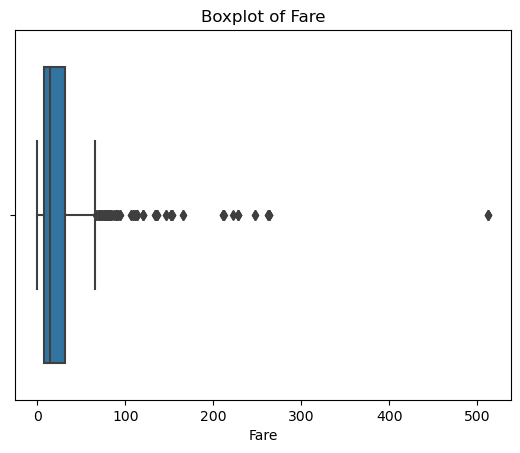

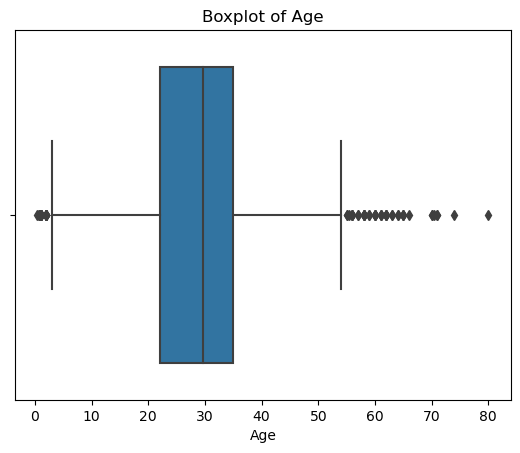

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4.1: Box plot for 'Fare'
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

# Step 4.1: Box plot for 'Age'
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()


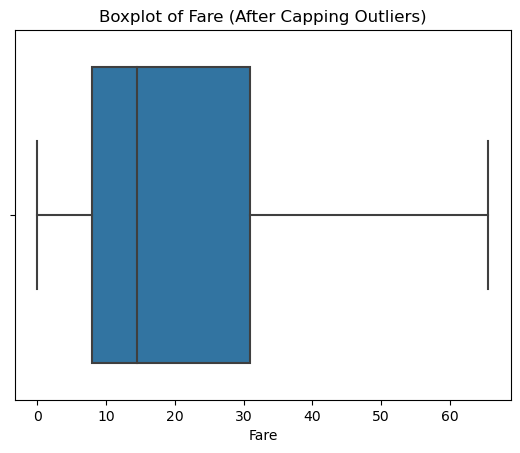

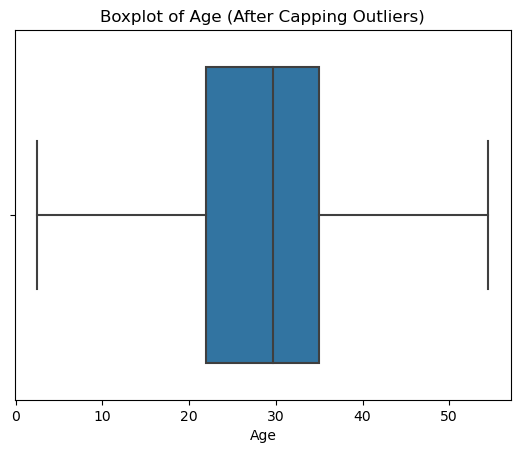

In [10]:
# Step 4.2: Define a function to cap outliers
def cap_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.clip(lower_bound, upper_bound)

# Apply the function to 'Fare' and 'Age'
df['Fare'] = cap_outliers(df['Fare'])
df['Age'] = cap_outliers(df['Age'])

# Verify changes with box plots again
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare (After Capping Outliers)")
plt.show()

sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (After Capping Outliers)")
plt.show()


In [11]:
# Step 5.1: Label encode the 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print("Unique values in 'Sex' after encoding:", df['Sex'].unique())

Unique values in 'Sex' after encoding: [0 1]


In [12]:
# Step 5.2: One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("Columns after one-hot encoding 'Embarked':", df.columns)


Columns after one-hot encoding 'Embarked': Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [13]:
# Step 5.3: Display the first 5 rows of the dataset
print("First 5 rows of the dataset after encoding:")
print(df.head())


First 5 rows of the dataset after encoding:
   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

   Sex   Age  SibSp  Parch      Ticket     Fare  Embarked_Q  Embarked_S  
0    0  28.0      0      0      248740  13.0000           0           1  
1    0  25.0      0      0      348123   7.6500           0           1  
2    0  20.0      0      0      350050   7.8542           0           1  
3    1  29.0      0      4      349909  21.0750           0           1  
4    0  31.0      1      0  F.C. 12750  52.0000           0           1  


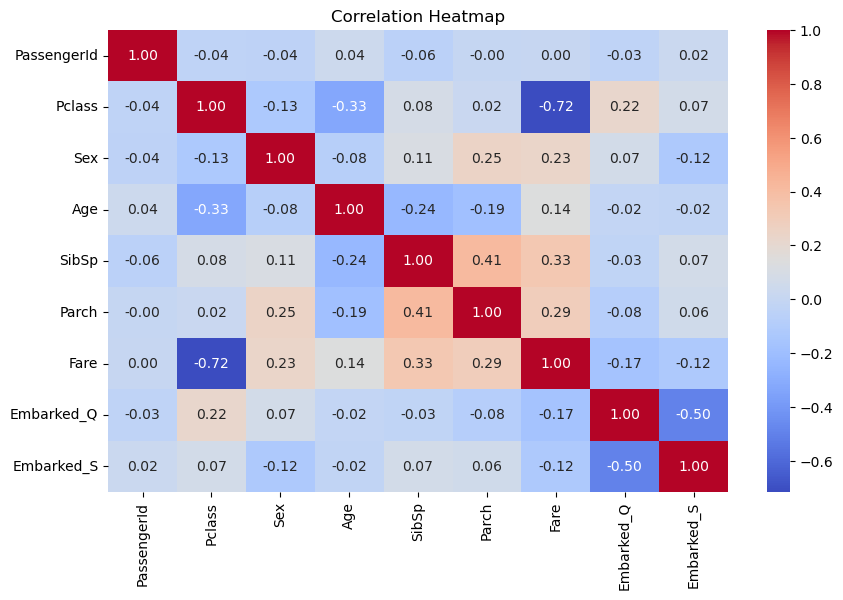

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6.1: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


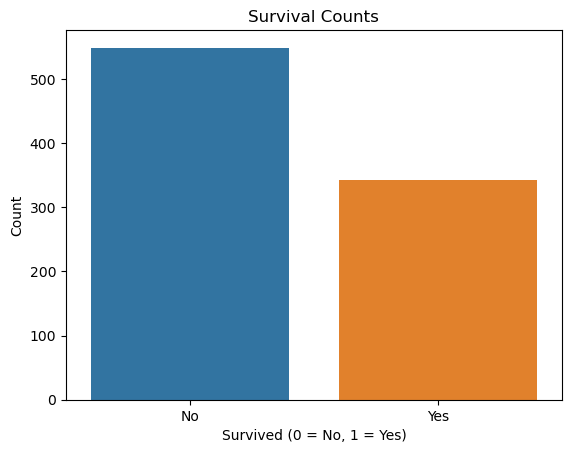

In [15]:
# Step 6.2: Bar plot for survival distribution
sns.countplot(x='Survived', data=df)
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


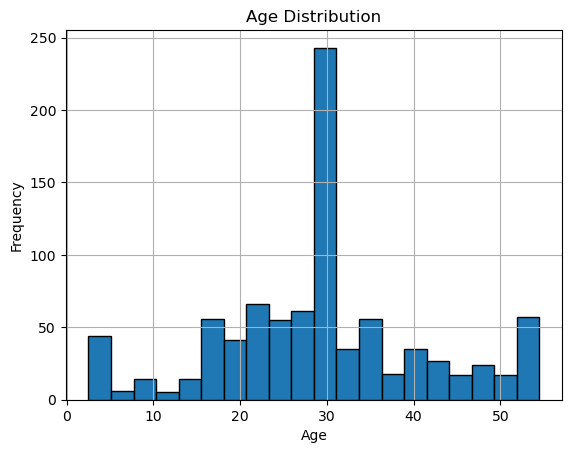

In [16]:
# Step 6.3: Histogram for Age distribution
df['Age'].hist(bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


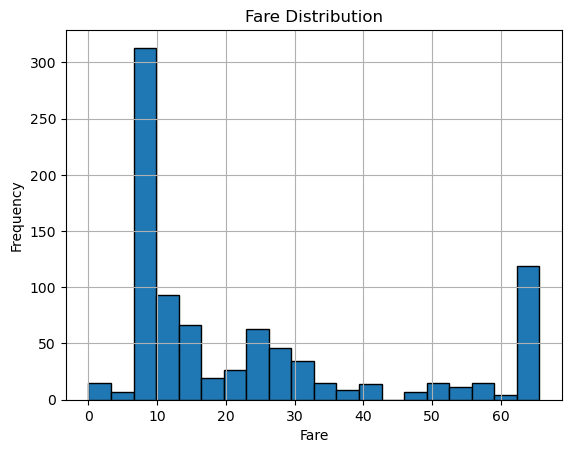

In [17]:
# Step 6.4: Histogram for Fare distribution
df['Fare'].hist(bins=20, edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


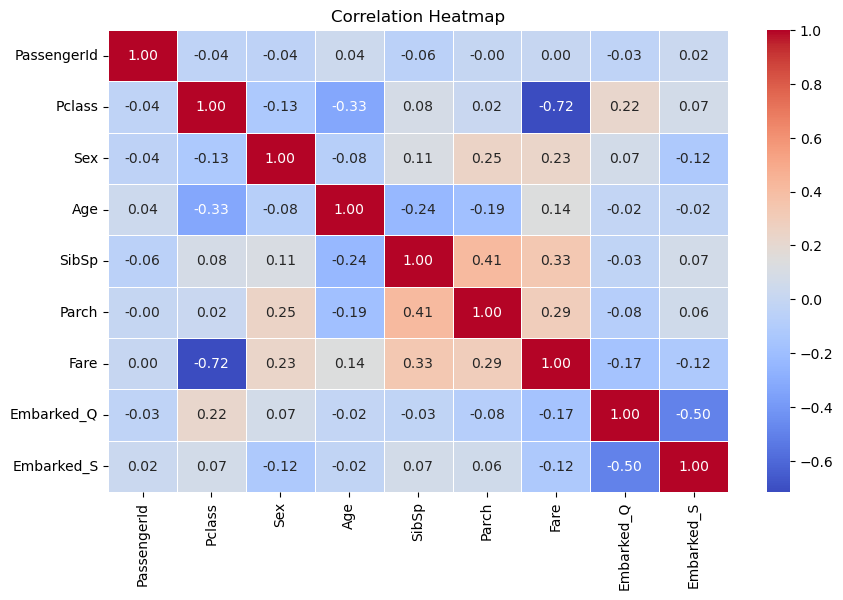

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


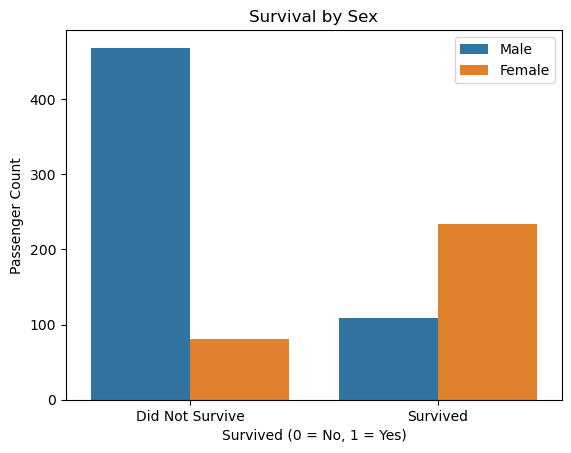

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.legend(['Male', 'Female'])
plt.show()


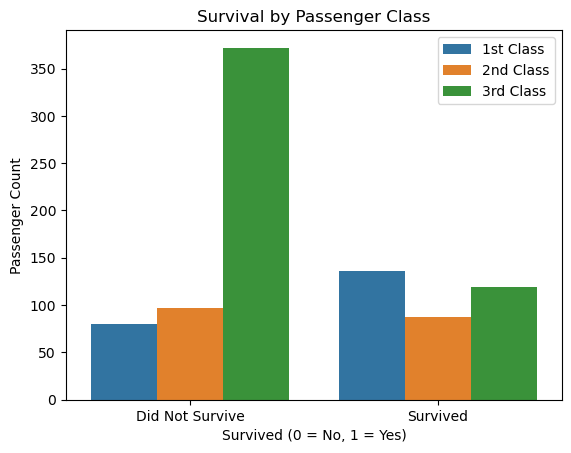

In [20]:
# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()


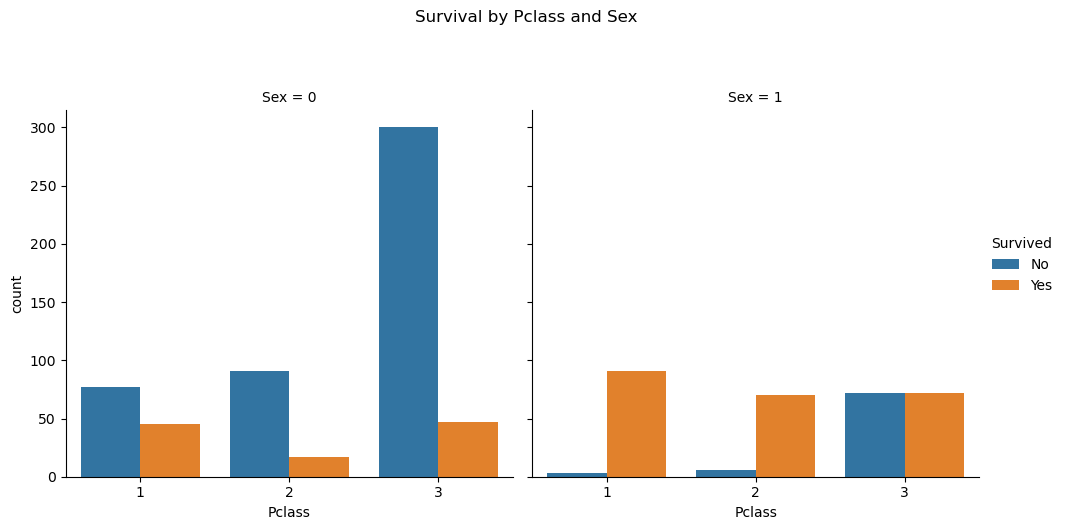

In [21]:
# Grouped bar plot: Survival by Sex and Pclass
sns.catplot(
    x='Pclass', hue='Survived', col='Sex',
    data=df, kind='count', height=5, aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Survival by Pclass and Sex", y=1.05)
plt.show()


In [22]:
# Save the cleaned dataset
cleaned_file_path = "/.cache/kagglehub/datasets/cleaned_titanic.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: /Users/mansoor/.cache/kagglehub/datasets/cleaned_titanic.csv


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1.1: Separate features and target
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])  # Drop unnecessary columns
y = df['Survived']

# Step 1.2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1.3: Standardize numerical features (e.g., Age, Fare)
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])


In [24]:
from sklearn.linear_model import LogisticRegression

# Step 2: Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3.1: Predict the test data
y_pred = model.predict(X_test)

# Step 3.2: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Model Accuracy: 0.79

Confusion Matrix:
 [[97 17]
 [21 44]]

Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.85      0.84       114
         Yes       0.72      0.68      0.70        65

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

